# 파이썬 머신러닝 스터디
## [파이썬 완벽가이드 6단원_차원축소]

### 01.차원 축소(Dimension Reduction) 개요

* 대표적인 차원 축소 알고리즘 : PCA, LDA, SVD, NMF

* 차원축소는 매우 많은 피처로 구성된 다차워 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.
> 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 된다. 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다. 또한 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성이 크다. 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가
높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.

=> 이렇게 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다. 

* 일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있다. 
> * 피처 선택, 즉 특성 선택은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것. 피처(특성) 추출은 기존 피처를 저
차원의 중요 피처로 압축해서 추출하는 것이다. 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는완전히 다른 값이 된다.
> * 피처 추출은 기존 피처를 단순 압축이 아닌. 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것. 피처 추출은 기존 피처를 단순 압축이 아닌. 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것.

이처럼 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니고 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있다.

### 02. PCA(Principal Component Analysis)

***PCA 개요***

* PCA(Principal Component Analysis)는 가장 대표적인 차원 죽소 기법으로 PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법이다. PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다. 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주합니다).
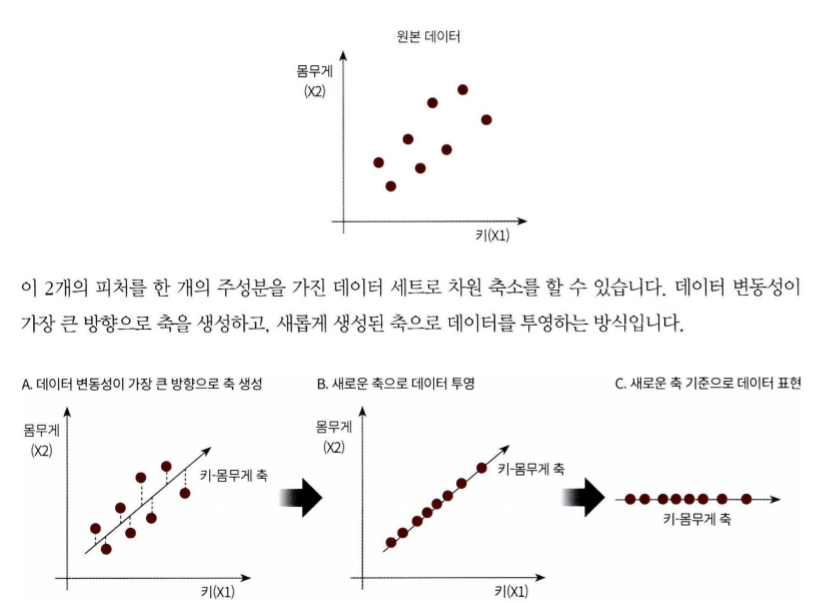

* 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고,
* 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 한다. 
* 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성한다. <br>
이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.
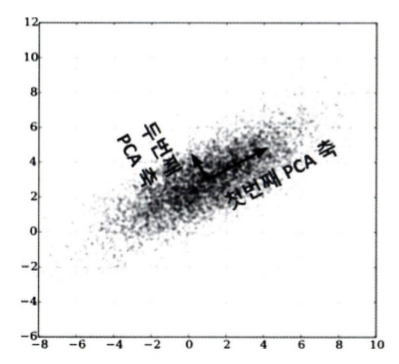
PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.

* PCA를 선형대수 관점에서 해석해 보면, 
> 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것. 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다. 고윳값(eigenvalue)은 바로 이 고유벡터의 크
기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다. 이 의미를 좀 더 자세히 알아보기 위해 선형 변환, 공분산 행렬과 고유벡터에 대해 알아보겠다.
>> * 선형 변환은 일반적으로 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미. 이를 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 볼 수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하
>> * 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬. 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미한다.
>> * 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭. 즉, Ax = ax(A는 행렬. x는 고유벡터. a는 스칼라값)이다. 이 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있다. 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용된다.
>> * 공분산 행렬은 정방행렬(Diagonal Matrix)이며 대칭행렬(Symmetric Matrix)입니다. 정방행렬은 열과 행이 같은 행렬을 지칭하는데. 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬, 즉 $A^{T}=A $인 행렬을 대칭행렬이라고 부른다. 공분산 행렬은 개별 분산값을 대각 원소로 하는 대칭행렬이다. 이 대칭행렬은 고유값 분해와 관련해 매우 좋은 특성이 있는데 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로. 고유값을 정방 행렬로 대각화할 수 있다는 것이다.
=> 입력 데이터의 공분산 행렬을 C<br>
$C = P\sum P^{T} $<br>
$C=\begin{pmatrix}
e_{1} & ... & e_{n}
\end{pmatrix}\begin{pmatrix}
\lambda_{1} & ... & 0\\
... & ... & ...\\
0 & ... & \lambda_{n}
\end{pmatrix}\begin{pmatrix}
e_{1}^{t} \\
...\\
e_{n}^{t}
\end{pmatrix}$<br>
즉, 공분산c는 고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해됨. $e_{i}는 i번째 고유벡터를, \lambda_{i}는 i번째 고유벡터의 크기를 의미$. e1는 가장 분산이 큰 방향을 가진 고유벡터이며, e2는 e1에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터.

=> 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분
해될 수 있으며. 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것!
* PCA 스텝<br>
1) 입력 데이터 세트의 공분산 행렬을 생성합니다.<br>
2) 공분산 행렬의 고유벡터와 고유값을 계산합니다.<br>
3) 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출합니다.<br>
4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.<br>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


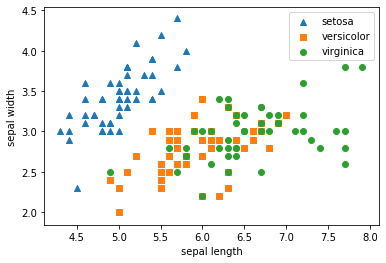

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


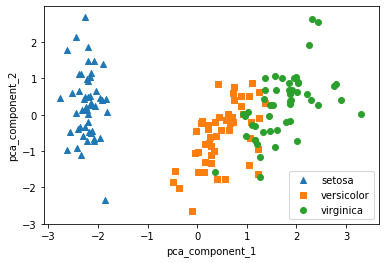

In [6]:

#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


=> 첫 번째 PCA 변환 요소인 pca_comp()nent_l이 전체 변동성의 약 72.9*%를 차지하며, 두 번째인
pca_component_2가 약 22.8%를 차지합니다. 따라서 PCA를 2개 요소로만 변환해도 원본 데이터
의 변동성을 95% 설명할 수 있습니다. 이번에는 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트
에 각각 분류를 적용한 후 결과를 비교하겠습니다. Estimator는 RandomForestClassifier를 이용하고
cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교합니다.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98039216 0.92156863 0.97916667]
원본 데이터 평균 정확도: 0.960375816993464


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.8627451  0.84313725 0.89583333]
PCA 변환 데이터 평균 정확도: 0.8672385620915034


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
import pandas as pd

df = pd.read_excel('C:\\Users\\Administrator\\Downloads\\credit_card.xls', sheet_name='Data')
print(df.shape)
df.head(3)

(30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [13]:

# header로 의미없는 첫행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('C:\\Users\\Administrator\\Downloads\\credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [14]:

df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [15]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


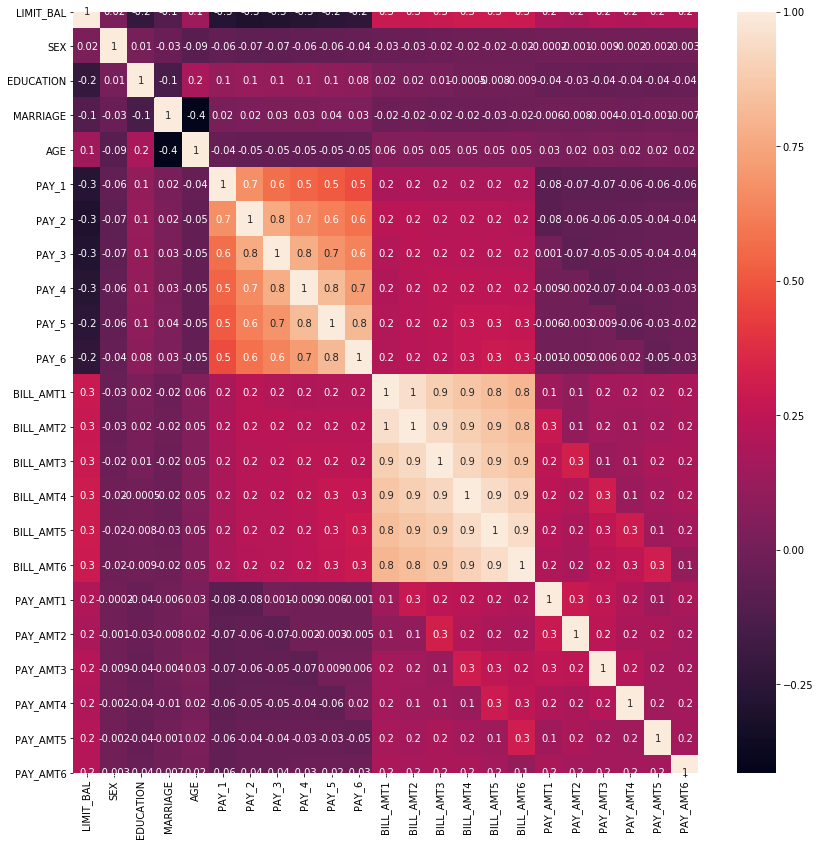

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
cols_pay = ['PAY_' + str(i) for i in range(1, 7)]
cols_amt = ['PAY_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)
cols_bill.extend(cols_pay)
cols_bill.extend(cols_amt)
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


PCA Component별 변동성: [0.36180187 0.20618472]


In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8081 0.8197 0.8232]
평균 정확도:0.8170


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7909 0.7977 0.802 ]
PCA 변환 데이터 셋 평균 정확도:0.7969


=> 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측
결과보다 약 1〜2% 정도의 예측 성능 저하만 발생했습니다. 1〜2%의 예측 성능 저하는 미비한 성능 저
하로 보기는 힘듭니다만. 전체 속성의 1/4 정도만으로도 이정도 수치의 예측 성능을 유지할 수 있다는
것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것이라고 생각됩니다.


PCA는 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용할 수 있습니다만, 이보다 더 활발하게 적용
되는 영역은 컴퓨터 비전(Computer Vision) 분야입니다. 특히 얼굴 인식의 경우 Eigen-face라고 불
리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많습니다.

### 03.LDA(Linear Discriminant Analysis)

***LDA 개요***

* LDA(Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사. 
* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다. 
* PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
* LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소한다. 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식.
* 일반적으로 LDA를 구하는 스텝은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤. 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점. 
* LDA를 구하는 스텝<br>
> 1) 클래스 내부와 클래스 간 분산 행렬을 구합니다. 0| 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구합니다.<br>
> 2) 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 SB라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있습
니다.<br>
$S_{W}^{T}S_{B}=\begin{pmatrix}
e_{1} & ... & e_{n}
\end{pmatrix}\begin{pmatrix}
\lambda_{1} & ... & 0\\
... & ... & ...\\
0 & ... & \lambda_{n}
\end{pmatrix}\begin{pmatrix}
e_{1}^{t} \\
...\\
e_{n}^{t}
\end{pmatrix}$<br>
> 3) 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출합니다.<br>
> 4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

=> PCA와 다르게 LDA에서 한 가지 유의해야 할 점은 LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이라는 것입니다. 즉, 클래스의 결정값이 변환 시에 필요합니다. 다음 Ida 객체의 fit( ) 메서드를 호출할 때 결정값이 입력됐음에 유의

In [21]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


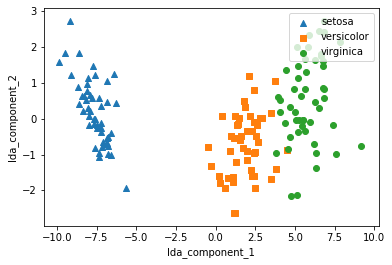

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 04. SVD(Singular Value Decomposition)

***SVD 개요***

* SVD 역시 PCA와 유사한 행렬 분해 기법을 이용. PCA의 경우 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다. 
* 일반적으로 SVD는 m X n 크기의 행렬 方를 다음과 같이 분해하는 것을 의미.<br>
$A=U\sum V^{T}$
* SVD는 특이값 분해로 불리며, 행렬 W V에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐. S는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0입니다. Sigma가 위치한 0이 아닌 값이 바로 행렬 A의 특이값입니다. SVD는 A의 차원이 m x n일 때 U의 차원이 m X m, U의 차원이 m x n, Vt의 차원이 n X n으로 분해한다.
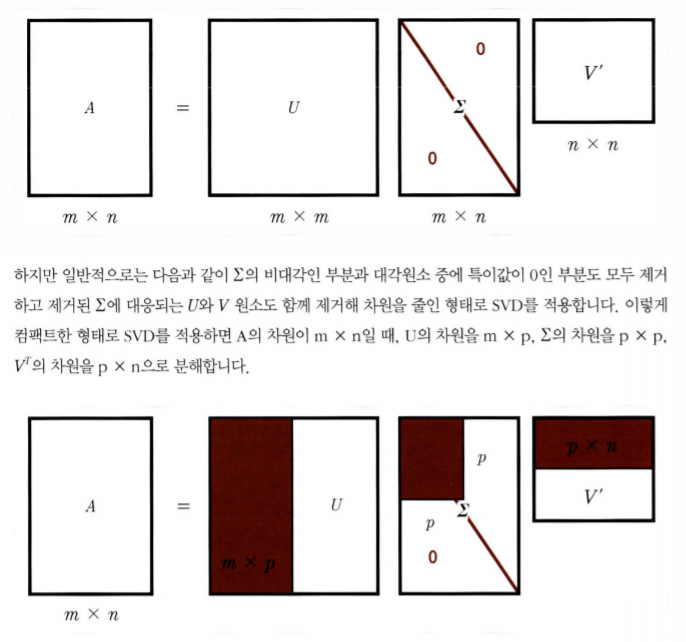

* Truncated SV1）는 X의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 W V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것입니다. 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행합니다

In [23]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


=> 이렇게 생성된 a 행렬에 SVD를 적용해 U, Sigma, Vt를 도출하겠습니다. SVD 분해는 numpy.linalg.
svd에 파라미터로 원본 행렬을 입력하면 U 행렬. Sigma 행렬, V 전치 행렬을 반환.
다. Sigma 행
렬의 경우, $\sum$ 행렬을 나타내며, 2 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고,
그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현합니다

In [24]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [25]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [26]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [27]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [28]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


*이번에는 Truncated SVD를 이용해 행렬을 분해해 보겠습니다. Truncated SVD는 $\sum$ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식입니다. 이렇게 분해하면 인위적으로 더 작은 차워의 U, $\sum, V^{T}$로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없습니다. 하지만
데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있습니다. 당연한 얘기지만, 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원할 수 있습니다.
Truncated SVD를 사이파이 모듈을 이용해 간단히 테스트해 보겠습니다. Truncated SVD는 넘파이가 아닌 사이파이에서만 지원됩니다. 사이파이는 SVD뿐만 아니라Truncated SVD도 지원합니다. 일
반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소 행렬로만 지원돼서  scipy.sparse.linalg.svds를 이용해야 합니다. 임의의 원본 행렬 6 x 6을 Normal SVD로
분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤 다시 Truncated SVD로 분해해 분해된 행렬의 차원. Sigma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교해 보겠습니다.


In [29]:
#Truncated SVD 를 이용한 행렬 분해

import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

***사이킷런 TruncatedSVD 클래스를 이용한 변환***

사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않는다. 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit( )와 transform( )을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환한다. 원본 데이터를 Truncated SVD 방
식으로 분해된 U*Sigma 행렬에 선형 변환해 생성.

Text(0, 0.5, 'TruncatedSVD Component 2')

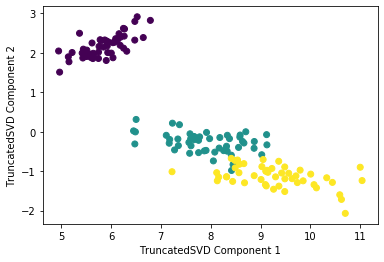

In [31]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

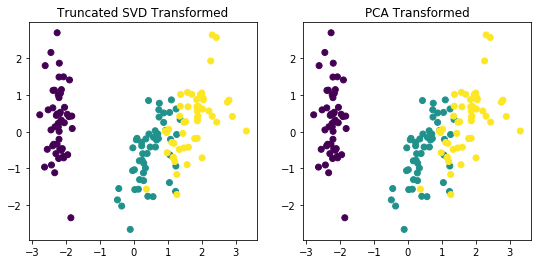

In [34]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [33]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3320465928714875e-15
-5.984795992119984e-17


=> 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있습니다. 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행합니다. 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미합니다. 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVI〕는 희소 행렬(Sparse Matrix)에 대한 변환도 가능합니다.
SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됩니다. 또한 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘입
니다.


### 05. NMF(Non-Negative Matrix Factorization)

***NMF 개요***

* NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사｛Low-Rank Approximation) 방식의 변형이다. NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.
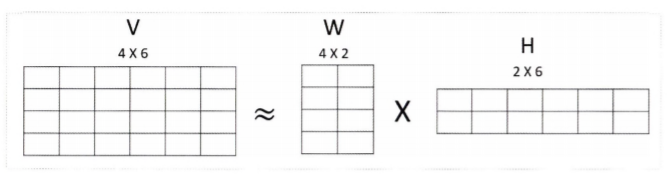

4 X 6 원본 행렬 V는 4 X 2 행렬 W와 2 X 6 행렬 H로 근사해 분해될 수 있습니다. 행렬 분해（Matrix Factorization）는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것이다. 이처럼 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W（즉, 원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬）와 작고 넓은 행렬 H（원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬）로 분해된다. 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다. 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열（즉, 원본 속성）로 어떻게 구성됐는지를 나타내는 행렬.
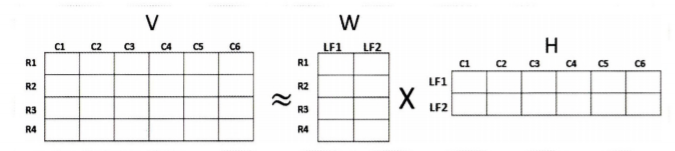

Text(0, 0.5, 'NMF Component 2')

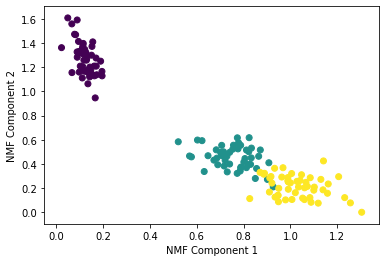

In [35]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

=> NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및
클러스터링에 잘 사용됩니다. 또한 영화 추천과 같은 추천(Recommendations) 영역에 활발하게 적용
됩니다. 사용자의 상품(예: 영화) 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를
행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를
통해 평가 순위(Rating)를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식입니다(이를 잠재 요
소(Latent Factoring) 기반의 추천 방식이라고 합니다).

### 06. 정리

지금까지 대표적인 차원 축소 알고리즘인 PCA, LDA, SVD. NMF에 대해서 알아봤습니다. 많은 피처로 이뤄진 데이터 세트를 PCA같은 차원 축소를 통해 더욱 직관적으로 이해할 수 있습니다. 무엇보다도 *차원 축소는 단순히 피처의 개수를 줄이는 개념보다는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있습니다.* 이 때문에 많은 차원을 가지는 이미지나 텍스트에서 PCA, SVD 등의 차원 축소 알고리즘이 활발하게 사용됩니다.
* PCA는 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려 는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식입니다. 
> 이를 위해 입력 데이터의 공분산 행렬을 기반으로 고유 벡터(Eigenvector)를 생성하고 이렇게 구한 고유 벡터에 입
력 데이터를 선형 변환하는 방식입니다. 
* LDA(Linear Discriminant Analysis)는 PCA와 매우 유사한 방식이며, PCA가 입력 데이터 변동성의 가장 큰 축을 찾는 데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소합니다.
* SVD와 NMF는 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법입니다. 
>특히 이러한 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델링이나 추천 시스템에서 활발하게 사용됩니다.
